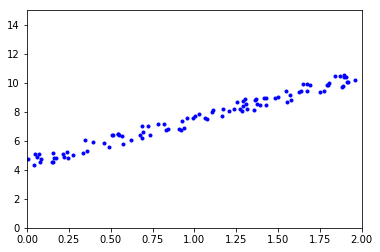

In [43]:
import numpy as np
import matplotlib.pyplot as plt
x=2*np.random.rand(100,1) # Gives random values b/w 0 and 1
y=4+3*x+np.random.rand(100,1)
plt.plot(x,y,'b.')
plt.axis([0,2,0,15])
plt.show()

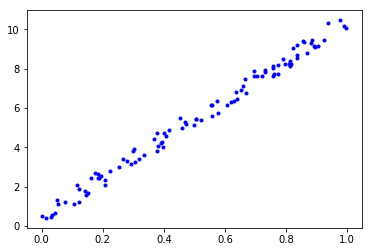

In [38]:
a=np.random.rand(100,1)
z=10*a+np.random.rand(100,1)
plt.plot(a,z,'b.')
plt.show()

In [7]:
# Lets compute theta_cap using normal equation
x_b=np.c_[np.ones((100,1)),x]
theta_best=np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [8]:
theta_best # this theta minimizes cost function

array([[ 4.49829847],
       [ 3.01129403]])

In [34]:
# Predict new y values using this theta
x_new=np.array([[0],[2]])
x_new_b=np.c_[np.ones((2,1)),x_new]
y_predict=x_new_b.dot(theta_best)
y_predict

array([[  4.49829847],
       [ 10.52088653]])

In [39]:
x_new

array([[0],
       [2]])

In [40]:
x_new.shape

(2, 1)

In [41]:
x_new_b

array([[ 1.,  0.],
       [ 1.,  2.]])

In [36]:
x_new_b.shape

(2, 2)

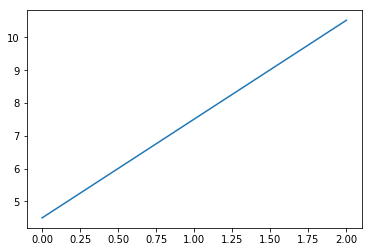

In [37]:
plt.plot(x_new,y_predict)

In [48]:
# same thing using skleran linear regression module
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x,y)
y_new=lin_reg.predict(x_new)
y_new

array([[  4.47183863],
       [ 10.52031176]])

In [49]:
# Polynomial regression
import numpy.random as rnd
np.random.seed(42)

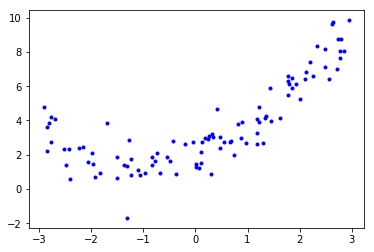

In [51]:
m=100
x=6*np.random.rand(m,1)-3
y=0.5*x**2+x+2+np.random.randn(m,1)
plt.plot(x,y,'b.')

In [54]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
x_poly=poly_features.fit_transform(x)
x[0]

array([ 1.76886782])

In [55]:
x_poly[0]

array([ 1.76886782,  3.12889337])

In [63]:
lin_reg.fit(x_poly,y)
print(lin_reg.intercept_,lin_reg.coef_)
print("ax**2 + bx + c")

[ 1.99958228] [[ 1.04630034  0.5015459 ]]
ax**2 + bx + c


In [58]:
x_new=np.linspace(-3,3,100).reshape(100,1)
x_new_poly=poly_features.transform(x_new)
y_new=lin_reg.predict(x_new_poly)

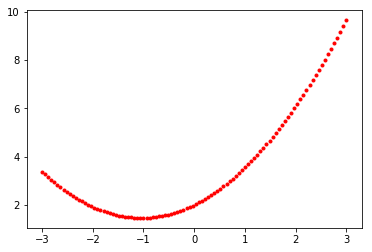

In [60]:
plt.plot(x_new,y_new,"r.")

In [64]:


from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

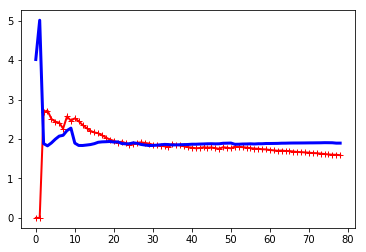

In [67]:
# Learning curve is one way to tell if model is under/over fitting data
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, x, y)

[0, 80, 0, 3]

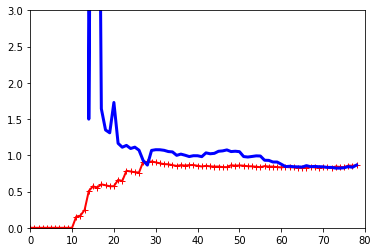

In [70]:
# Check again using higher order polynomial
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, x, y)
plt.axis([0, 80, 0, 3]) 

In [71]:
# Logistic regression: Use linear regression algo for classification
from sklearn import datasets
iris=datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [73]:
x=iris["data"][:,3:]
y=(iris["target"]==2).astype(np.int)

In [75]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(random_state=42)
log_reg.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

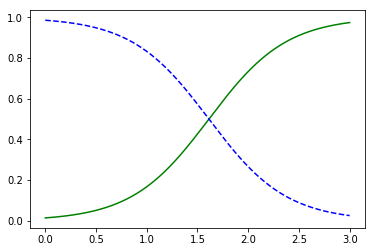

In [82]:
x_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(x_new)

plt.plot(x_new, y_proba[:, 1], "g-")
plt.plot(x_new, y_proba[:, 0], "b--")

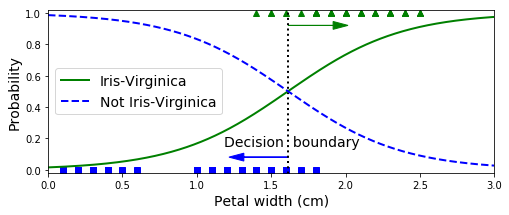

In [85]:
X=x
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

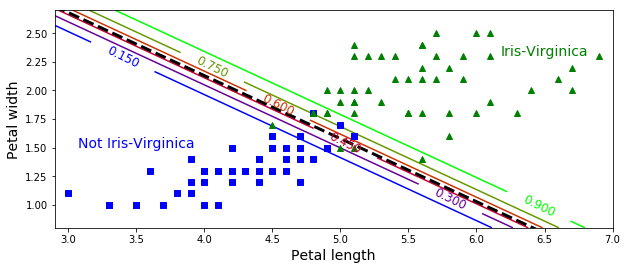

In [86]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [87]:
# Softmax OR Multinomial Logistic Regression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

/home/vineet/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


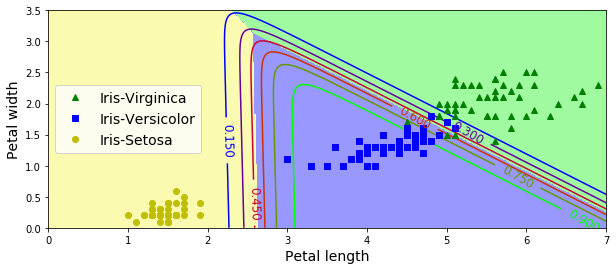

In [88]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)
zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()
